<a href="https://colab.research.google.com/github/JK1716/PRODIGY_ML_04/blob/main/Task_04_ML_Prodigy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Kalkidan Tsegaye Gebresilassie

**Internship:** Machine Learning

**Prodigy Task 4**

**supervised learning problem within the field of computer vision:**

Develop a hand gesture recognition model that accurately identify and classify different hand gestures from image or video data, enabling intuitive human computer interaction and gesture-based control systems

**Dataset Link:** https://www.kaggle.com/datasets/gti-upm/leapgestrecog

**1. Packages**

First, let's run the cell below to import all the packages that wil be used during this assignment.
1.Data Preparation: Collect or use a dataset with diverse hand gesture images and Organize the dataset into subdirectories, each corresponding to a specific hand gesture class.

**2.Model Architecture:**

Design a CNN architecture suitable for image classification and Choose appropriate hyperparameters, including image size, batch size, and number of epochs.

**3.Data Preprocessing:**

Use ImageDataGenerator for loading and preprocessing images and Apply data augmentation to enhance model generalization.

**4.Model Training:**  

Train the model on the preprocessed dataset, monitoring validation performance and Adjust hyperparameters based on training results.

**5.Prediction:**  

Create a function to make predictions on individual images using the trained model.

**6.Save and Load:**

 Save the trained model for future use and Load the model when needed for making predictions on new data.

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [62]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "drive/MyDrive/train_03"

In [63]:
image_data = []
for category in CATEGORIES:
    class_index = CATEGORIES.index(category)
    path = os.path.join(data_path, category)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
        except Exception as e:
            pass
image_data[0]

[array([[5, 5, 4, ..., 4, 3, 3],
        [4, 4, 4, ..., 4, 3, 3],
        [4, 5, 5, ..., 4, 4, 4],
        ...,
        [5, 5, 5, ..., 4, 4, 5],
        [6, 5, 4, ..., 4, 4, 5],
        [7, 5, 6, ..., 3, 4, 6]], dtype=uint8),
 0]

In [64]:
# shuffle the input data
import random
random.shuffle(image_data)

In [65]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [66]:
label[:10]

[8, 3, 1, 0, 1, 7, 4, 8, 6, 7]

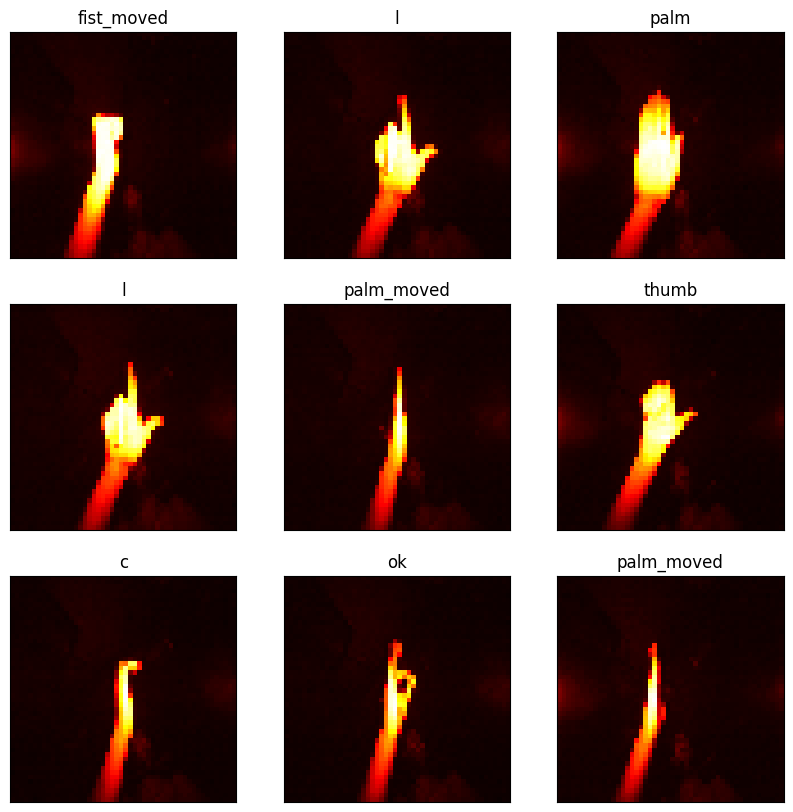

In [67]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [68]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(2000, 50, 50)

In [69]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

In [70]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [71]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [72]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

def create_model(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

data_dir = 'drive/MyDrive/train_03'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

model.save('hand_gesture_model.h5')


Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Epoch 1/10
50/50 [==============================] - 76s 1s/step - loss: 0.4128 - accuracy: 0.8619 - val_loss: 0.1542 - val_accuracy: 0.9625
Epoch 2/10
50/50 [==============================] - 76s 2s/step - loss: 4.0922e-05 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9700
Epoch 3/10
50/50 [==============================] - 75s 1s/step - loss: 4.4587e-06 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9725
Epoch 4/10
50/50 [==============================] - 81s 2s/step - loss: 2.3529e-06 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9725
Epoch 5/10
50/50 [==============================] - 74s 1s/step - loss: 1.4743e-06 - accuracy: 1.0000 - val_loss: 0.1873 - val_accuracy: 0.9725
Epoch 6/10
50/50 [==============================] - 79s 2s/step - loss: 1.0209e-06 - accuracy: 1.0000 - val_loss: 0.1936 - val_accuracy: 0.9725
Epoch 7/10
50/50 [==============================] - 74s

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 128)      

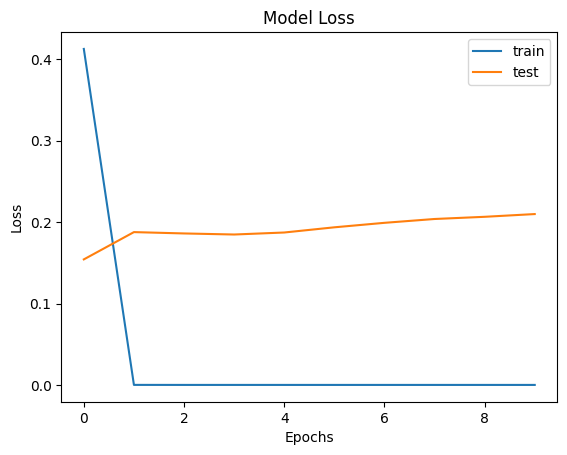

In [74]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

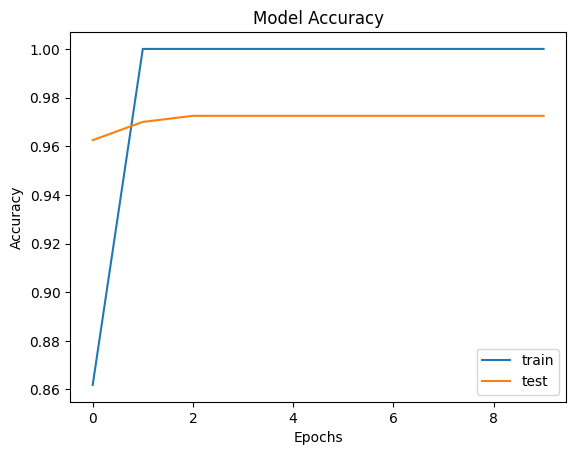

In [75]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [76]:
#calculate loss and accuracy on test data
import cv2
import numpy as np

resized_X_test = []
for img in X_test:
    img_8bit = cv2.convertScaleAbs(img)  # Convert to 8-bit grayscale image
    resized_img = cv2.cvtColor(img_8bit, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB
    resized_img = cv2.resize(resized_img, (128, 128))
    resized_X_test.append(resized_img)

resized_X_test = np.array(resized_X_test)

test_loss, test_accuracy = model.evaluate(resized_X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy * 100))

19/19 [==============================] - 5s 267ms/step - loss: 0.0377 - accuracy: 0.9933
Test accuracy: 99.33%


1/1 [==============================] - 0s 94ms/step


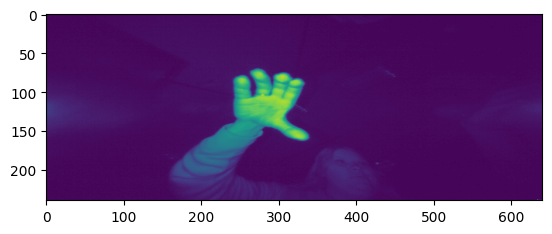

The predicted hand gesture is: 10_down


In [77]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('hand_gesture_model.h5')

def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_labels = list(train_generator.class_indices.keys())
    predicted_gesture = class_labels[predicted_class]

    return predicted_gesture

image_path_to_predict = 'drive/MyDrive/test_03/frame_02_10_0009.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")

In [86]:
rm -rf PRODIGY_ML_04

In [88]:
!git clone https://github.com/JK1716/PRODIGY_ML_04.git

Cloning into 'PRODIGY_ML_04'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), done.
